<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width=50%>

# Scikit-Learn에서의 Decision Tree 예제

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#라이브러리-가져오기" data-toc-modified-id="라이브러리-가져오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>라이브러리 가져오기</a></span></li><li><span><a href="#하이퍼파라미터-설정하기" data-toc-modified-id="하이퍼파라미터-설정하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>하이퍼파라미터 설정하기</a></span></li><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 불러오기</a></span><ul class="toc-item"><li><span><a href="#데이터-설명-확인하기" data-toc-modified-id="데이터-설명-확인하기-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>데이터 설명 확인하기</a></span></li><li><span><a href="#데이터의-독립변수-확인" data-toc-modified-id="데이터의-독립변수-확인-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>데이터의 독립변수 확인</a></span></li><li><span><a href="#데이터의-종속변수-확인" data-toc-modified-id="데이터의-종속변수-확인-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>데이터의 종속변수 확인</a></span></li><li><span><a href="#데이터-시각화하기" data-toc-modified-id="데이터-시각화하기-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>데이터 시각화하기</a></span></li></ul></li><li><span><a href="#모델링하기" data-toc-modified-id="모델링하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>모델링하기</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-학습하기" data-toc-modified-id="Decision-Tree-학습하기-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Decision Tree 학습하기</a></span></li></ul></li><li><span><a href="#추론하기" data-toc-modified-id="추론하기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>추론하기</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree의-노드-확인하기" data-toc-modified-id="Decision-Tree의-노드-확인하기-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Decision Tree의 노드 확인하기</a></span></li></ul></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

## 라이브러리 가져오기

In [1]:
import os
import sys
import random
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 하이퍼파라미터 설정하기

In [2]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

## 데이터 불러오기

In [3]:
# Load data
iris = load_iris()

### 데이터 설명 확인하기

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 데이터의 독립변수 확인

In [5]:
iris.feature_names # 4C2 = 6개쌍의 관계를 살펴볼 것

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris.data.shape

(150, 4)

### 데이터의 종속변수 확인

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris.target.shape

(150,)

In [10]:
iris_class = {n:c for n,c in enumerate(iris.target_names)}
iris_class

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

### 데이터 시각화하기

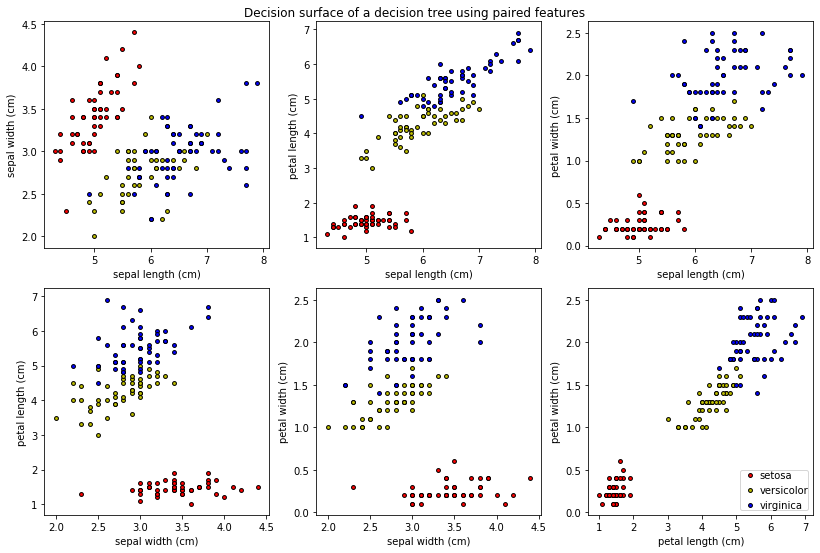

In [11]:
plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 모델링하기

### Decision Tree 학습하기

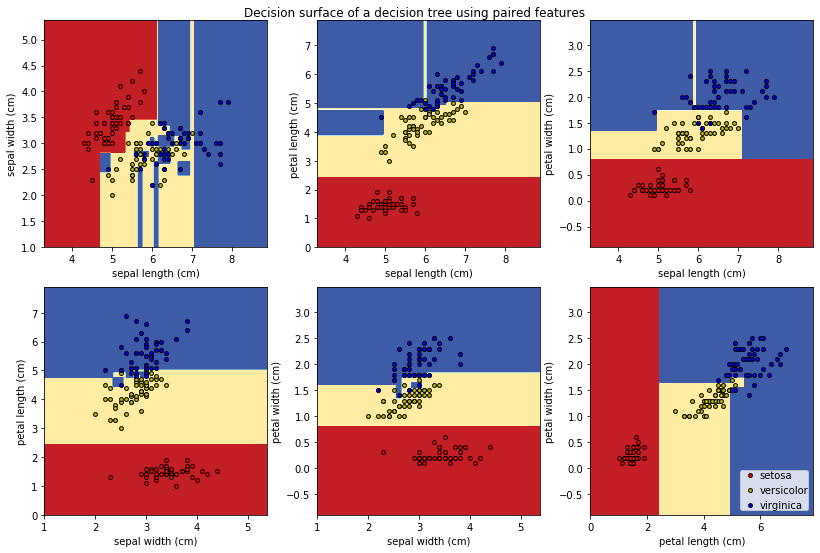

In [12]:
plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 추론하기

In [13]:
clf = DecisionTreeClassifier().fit(iris.data,iris.target)
_input = [5. , 3.4, 1.5, 0.2] # 원하는 값을 입력해보세요하지만 
y_pred = clf.predict([_input]) 
iris_class[y_pred[0]]

'setosa'

### Decision Tree의 노드 확인하기

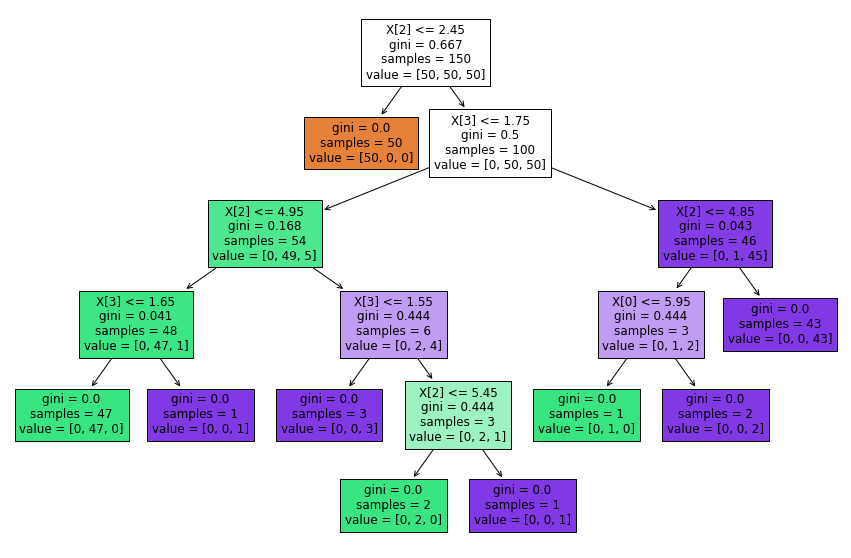

In [14]:
plt.figure(figsize=(15, 10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

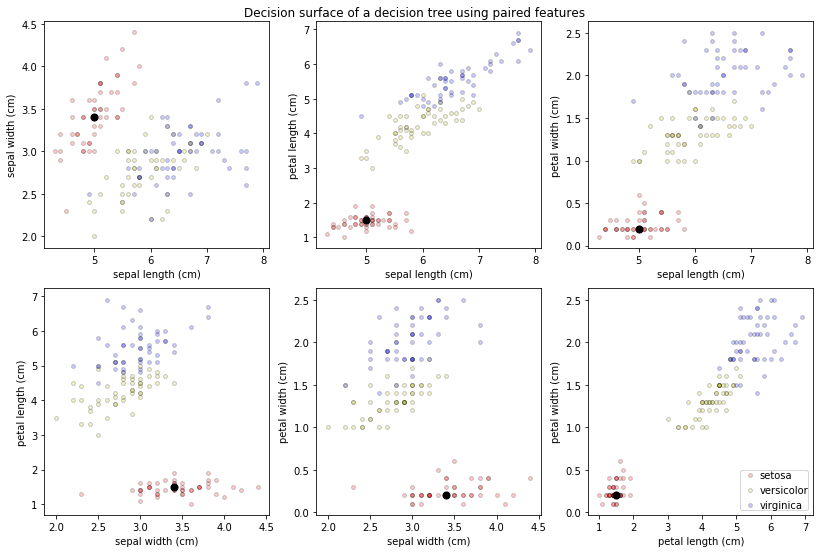

In [15]:
plt.figure(figsize=(12, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15, alpha=0.2)
    plt.scatter(_input[pair[0]], _input[pair[1]], c='black', 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=50)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 참고자료

- https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py